In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Square Wave

In [2]:
df=pd.read_csv("1e3.cloud")

In [3]:
len(df)
density=100000
for i in range(15):
    df.iloc[i*100:,4]=density
    if density>1100:
        density=1.0e3
    else:
        density=1.0e5

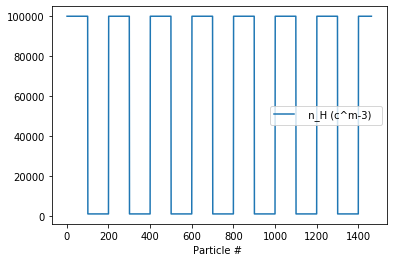

In [4]:
fig,ax=plt.subplots()
df.plot(y="  n_H (c^m-3)  ",x="Particle # ",ax=ax)

In [5]:
df

,Particle #,x (cm),y (cm),z (cm),n_H (c^m-3),T_gas (K),T_dust (K),chi (Draine),Type (I|P|D)
0,1,-3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
1,2,-3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
2,3,-3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
3,4,-3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
4,5,-3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
...,...,...,...,...,...,...,...,...,...
1458,1459,3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
1459,1460,3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
1460,1461,3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P
1461,1462,3.180156e+19,0.0,0.0,100000.0,50.0,20.0,0.0,P


In [11]:
df.to_csv("cloud-square.dat",index=False)

# Sine Wave
The harsh changes of the square wave caused problems in UCLPDR so I'm trying sine waves to see if the changing density still works in UCLCHEM. If it does, we can assume that UCLPDR is the problem in the square wave benchmark

In [3]:
df=pd.read_csv("1e3.cloud")

In [23]:
min_dens=1e3
max_dens=1e5
period=200

df.iloc[:,4]=(min_dens+0.5*max_dens+0.5*max_dens*np.sin(df.iloc[:,0]*2*np.pi/period))

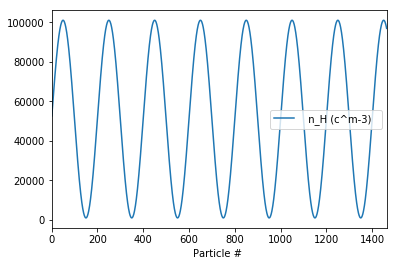

In [26]:
fig,ax=plt.subplots()
df.plot(y="  n_H (c^m-3)  ",x="Particle # ",ax=ax)

In [27]:
df.to_csv("cloud-sine.dat",index=False)

# Rising Density

In [25]:
df=pd.read_csv("cloud-1d-n=1e3.dat")

In [26]:
n_points=len(df)
density=np.linspace(100,1e5,n_points)

In [27]:
df["  n_H (c^m-3)  "]=density

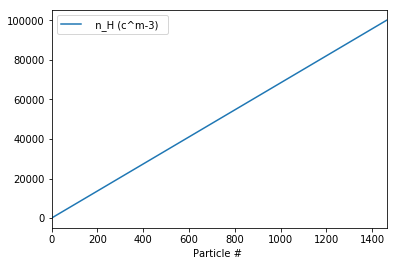

In [28]:
fig,ax=plt.subplots()
df.plot(y="  n_H (c^m-3)  ",x="Particle # ",ax=ax)

In [29]:
df.to_csv("linear-density-increase.dat",index=False)

# Falling Density

In [18]:
df=pd.read_csv("cloud-1d-n=1e3.dat")
n_points=len(df)
density=np.linspace(1e5,100,n_points)
df["  n_H (c^m-3)  "]=density

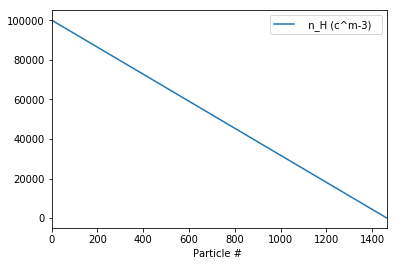

In [19]:
fig,ax=plt.subplots()
df.plot(y="  n_H (c^m-3)  ",x="Particle # ",ax=ax)

In [20]:
df.to_csv("linear-density-decrease.dat",index=False)

# Bisbas

In [22]:
df=pd.read_csv("1e3.cloud")

In [23]:
tom_df=pd.read_csv("../Cloud-Models/thomas_bisbas_cloud.dat")

In [24]:
tom_df["x(cm)"]=3.08568025e18*tom_df["x(pc)"]

In [25]:
df=df.loc[0:len(tom_df)]

In [39]:
df['      x (cm)      ']=tom_df["x(cm)"]
df['  n_H (c^m-3)  ']=tom_df["density"]
df=df.dropna()#
df.to_csv("bisbas.dat",index=False)

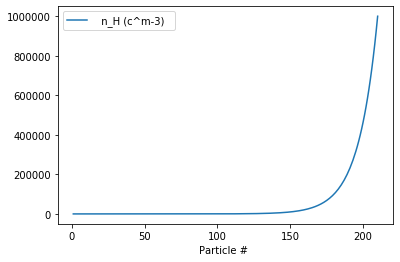

In [40]:
fig,ax=plt.subplots()
df.plot(y="  n_H (c^m-3)  ",x="Particle # ",ax=ax)

In [28]:
df.columns

Index(['Particle # ', '      x (cm)      ', '      y (cm)      ',
       '      z (cm)      ', '  n_H (c^m-3)  ', '   T_gas (K)   ',
       '  T_dust (K)   ', ' chi (Draine)  ', ' Type (I|P|D)'],
      dtype='object')

In [42]:

dataframe_file="../Benchmarks/bisbas_output.csv" #filename to store uclpdr output in a machine readable form
output_df=pd.read_csv(dataframe_file)
output_df["Mg"]="With MG"

dataframe_file="../Benchmarks/bisbas_no_mg_output.csv"
output_df=output_df.append(pd.read_csv(dataframe_file))
output_df["Mg"]=output_df["Mg"].fillna("No Mg")


In [45]:
cols=["C+_abun","C_abun","CO_abun"]
plot_df=output_df[["n_H","Mg"]+cols]

In [48]:
plot_df=plot_df.melt(id_vars=["n_H","Mg"])

In [49]:
plot_df

,n_H,Mg,variable,value
0,0.107978,With MG,C+_abun,0.0001
1,0.116591,With MG,C+_abun,0.0001
2,0.125893,With MG,C+_abun,0.0001
3,0.135936,With MG,C+_abun,0.0001
4,0.146780,With MG,C+_abun,0.0001
...,...,...,...,...
1255,735642.000000,No Mg,CO_abun,0.0001
1256,794328.000000,No Mg,CO_abun,0.0001
1257,857696.000000,No Mg,CO_abun,0.0001
1258,926119.000000,No Mg,CO_abun,0.0001


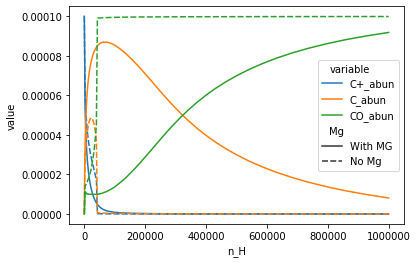

In [53]:
import seaborn as sns


In [52]:
plot_df

,n_H,Mg,variable,value
0,0.107978,With MG,C+_abun,0.0001
1,0.116591,With MG,C+_abun,0.0001
2,0.125893,With MG,C+_abun,0.0001
3,0.135936,With MG,C+_abun,0.0001
4,0.146780,With MG,C+_abun,0.0001
...,...,...,...,...
1255,735642.000000,No Mg,CO_abun,0.0001
1256,794328.000000,No Mg,CO_abun,0.0001
1257,857696.000000,No Mg,CO_abun,0.0001
1258,926119.000000,No Mg,CO_abun,0.0001
